In [1]:
# export
import numpy as np
from queue import SimpleQueue
import cv2
import matplotlib.pyplot as plt

In [2]:
#export
from Export.nb_PixelManipulation import iterateImage, getChannels

## Import frog image

In [3]:
frog_img = cv2.imread('Images/dat_boi.jpg')

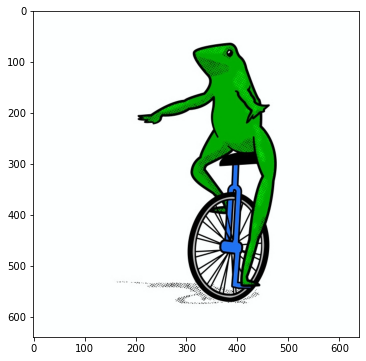

In [4]:
plt.figure(figsize=(6,6))
plt.imshow(frog_img);

## Update LUT Table

In [5]:
old_frog = frog_img.copy()

In [6]:
# export
def updateColorProximity(img : np.array, update_colour : np.array, new_colour : np.array, distance_thresh : float):
    i = 0; j = 0; k = 0
    _, height, width, channels, _ = getChannels(img)
    update_pixels = SimpleQueue()
    current_colour = np.array([0] * channels, dtype = np.uint8)
    for px in np.nditer(img, order = 'C', op_flags = ['readwrite']):
        update_pixels.put(px)
        current_colour[k] = px
        i, j, k = iterateImage(i, j, k, channels, width)
        if k == 0:
            if np.linalg.norm(current_colour - update_colour) < distance_thresh:
                for update_val in new_colour:
                    update_px = update_pixels.get()
                    update_px[...] = update_val
            else:
                for _ in range(channels) : update_pixels.get()

In [7]:
updateColorProximity(frog_img, np.array([0, 0, 0], dtype = np.uint8), np.array([0, 200, 200], dtype = np.uint8), 1);
updateColorProximity(frog_img, np.array([0, 200, 200], dtype = np.uint8), np.array([0, 0, 0], dtype = np.uint8), 1);

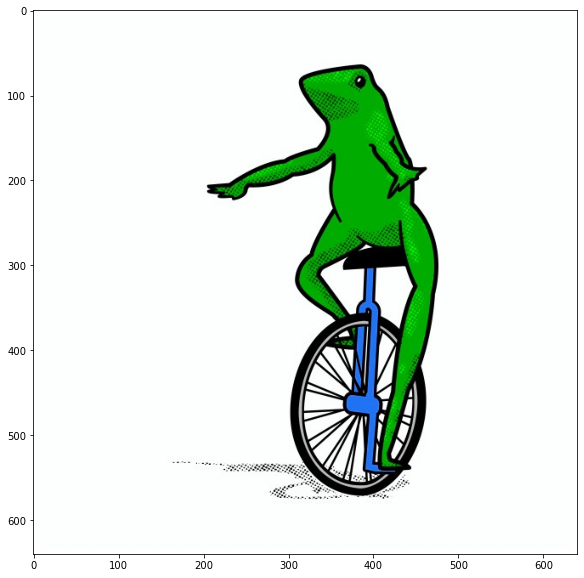

In [8]:
plt.figure(figsize=(10,10))
plt.imshow(frog_img);

In [9]:
assert(np.linalg.norm(old_frog - frog_img) < 1e-7)